In [42]:
# Loading the required packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

## Loading the data

In [43]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,StartDate,EndDate,Status,Progress,Duration__in_seconds_,Finished,RecordedDate,ResponseId,DistributionChannel,...,Q48,Q50,Q49,age,income,zip_residence1,zip_workplace1,age_clustered,filter_.,experience
0,1,2024-04-10 11:31:11,2024-04-10 11:34:50,IP Address,100,219,True,2024-04-10 11:34:51,R_4NHYzPwt2i5v73I0,anonymous,...,8,8,5,30.0,3375,West Vlaanderen,West Vlaanderen,39.0,Selected,6
1,2,2024-04-10 12:02:54,2024-04-10 12:07:52,IP Address,100,298,True,2024-04-10 12:07:53,R_1PyWNMx2BekAP4t,anonymous,...,3,8,6,23.0,3375,Oost Vlaanderen,Oost Vlaanderen,29.0,Selected,2
2,3,2024-04-10 12:30:42,2024-04-10 12:35:40,IP Address,100,297,True,2024-04-10 12:35:41,R_1I60oaf7czBQLA0,anonymous,...,7,8,5,24.0,2875,Brussel,Oost Vlaanderen,29.0,Selected,1
3,4,2024-04-10 12:53:09,2024-04-10 12:57:00,IP Address,100,230,True,2024-04-10 12:57:00,R_6TNTpuvtUDMfFWW,anonymous,...,6,6,4,40.0,4875,West Vlaanderen,West Vlaanderen,49.0,Selected,15
4,5,2024-04-10 12:56:02,2024-04-10 13:00:36,IP Address,100,273,True,2024-04-10 13:00:36,R_2w7NYltLY0YwkRr,anonymous,...,10,9,7,23.0,2875,Antwerpen,Oost Vlaanderen,29.0,Selected,1


# Preprocessing the data

#### Categorizing the degree column into three different categories: 
#### Lower than Masters, Masters, and Above Masters

In [44]:
# Define the mapping
degree_mapping = {
    'Academic master': 'Masters',
    'Professional bachelor': 'Lower than Masters',
    'PhD': 'Above Masters',
    'Graduate program': 'Above Masters',
    'Academic bachelor': 'Lower than Masters',
    'Secondary education': 'Lower than Masters'
}

# Apply the mapping to create a new column
data['degree_category'] = data['degree'].map(degree_mapping)

#### Categorizing the number experience category

In [45]:
# Define the function to categorize experience
def categorize_experience(years):
    if years <= 5:
        return 'Entry-Level (0-5 yrs)'
    elif years <= 10:
        return 'Associate (6-10 yrs)'
    elif years <= 15:
        return 'Mid-Level(11-15 yrs)'
    elif years <= 20:
        return 'Senior (16-20 yrs)'
    elif years <= 25:
        return 'Lead (21-25 yrs)'
    elif years <= 30:
        return 'Principal (26-30 yrs)'
    elif years <= 35:
        return 'Director (31-35 yrs)'
    else:
        return 'Executive (36- 40 yrs)'


# Apply the function to the experience column
data['experience_category'] = data['experience'].apply(categorize_experience)

#### Renaming the columns according to the benefits received by the candidates in the survey

In [46]:
data['Benefit_Car'] = data['Q14_1']
data['Benefit_Fuel_Card'] = data['Q14_2']
data['Benefit_Commuting_Allowance'] = data ['Q14_3']
data['Benefit_Phone'] = data['Q14_4']
data['Benefit_Phone_Subscription'] = data['Q14_5']
data['Benefit_Computer'] = data['Q14_6']
data['Benefit_Meal Vouchers'] = data['Q14_7']
data['Benefit_Ecocheques'] = data['Q14_8']
data['Benefit_Hospitalisation Insurance'] = data['Q14_9']
data['Benefit_Group Insurance'] = data['Q14_10']
data['Benefit_13 month'] = data['Q14_11']
data['Benefit_14 month'] = data['Q14_12']
data['Benefit_15 month'] = data['Q14_13']
data['Benefit_Bonus'] = data['Q14_14']
data['Benefit_Commission'] = data['Q14_15']
data['Benefit_Compensation'] = data['Q14_16']
data['Benefit_Discount on Purchase'] = data['Q14_17']
data['Benefit_Telework'] = data['Q14_18']
data['Benefit_Internet'] = data['Q14_19']
data['Benefit_Meals at Company Restaurant'] = data['Q14_20']
data['Benefit_Reimbursement'] = data['Q14_21']
data['Benefit_Gift'] = data['Q14_22']
data['Benefit_Stock'] = data['Q14_23']
data['Benefit_Fitness'] = data['Q14_24']
data['Benefit_Tablet'] = data['Q14_25']
data['Benefit_Culture and Sports Vouchers'] = data['Q14_26']
data['Benefit_Ironing'] = data['Q14_27']

In [47]:
# List of specific columns to replace NaN with 0
columns_to_fill = [ 'Benefit_Car','Benefit_Fuel_Card', 'Benefit_Commuting_Allowance', 'Benefit_Phone', 
    'Benefit_Phone_Subscription', 'Benefit_Computer', 'Benefit_Meal Vouchers', 
    'Benefit_Ecocheques', 'Benefit_Hospitalisation Insurance', 'Benefit_Group Insurance', 
    'Benefit_13 month', 'Benefit_14 month', 'Benefit_15 month', 'Benefit_Bonus', 
    'Benefit_Commission', 'Benefit_Compensation', 'Benefit_Discount on Purchase', 'Benefit_Telework', 'Benefit_Internet', 
    'Benefit_Meals at Company Restaurant', 'Benefit_Reimbursement', 'Benefit_Gift', 'Benefit_Stock', 
    'Benefit_Fitness', 'Benefit_Tablet', 'Benefit_Culture and Sports Vouchers', 'Benefit_Ironing'
]

# Replace NaN values with 0 only in the specified columns
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# Converting these columns to categorical variables
data[columns_to_fill] = data[columns_to_fill].astype('category')

#### Selecting only the required columns

In [51]:
data = data[['zip_workplace1', 'degree_category', 'experience_category', 'education', 'nace', 'Benefit_Car','Benefit_Fuel_Card', 'Benefit_Commuting_Allowance', 'Benefit_Phone', 
    'Benefit_Phone_Subscription', 'Benefit_Computer', 'Benefit_Meal Vouchers', 
    'Benefit_Ecocheques', 'Benefit_Hospitalisation Insurance', 'Benefit_Group Insurance', 
    'Benefit_13 month', 'Benefit_14 month', 'Benefit_15 month', 'Benefit_Bonus', 
    'Benefit_Commission', 'Benefit_Compensation', 'Benefit_Discount on Purchase', 'Benefit_Telework', 'Benefit_Internet', 
    'Benefit_Meals at Company Restaurant', 'Benefit_Reimbursement', 'Benefit_Gift', 'Benefit_Stock', 
    'Benefit_Fitness', 'Benefit_Tablet', 'Benefit_Culture and Sports Vouchers', 'Benefit_Ironing', 'income']]

#### Dropping the Missing Values

In [52]:
data = data.dropna()

# Exploratory Data Analysis

#### Summary Statistics

In [53]:
# Step 2: Summary Statistics
summary_stats = data.describe(include='object')  # Describe categorical variables
summary_stats

,zip_workplace1,degree_category,experience_category,education,nace
count,541,541,541,541,541
unique,5,3,8,8,29
top,West Vlaanderen,Masters,Entry-Level (0-5 yrs),Industrial engineering,Other
freq,209,495,203,298,144


#### Visualizations

#### 1. Workplace Distribution

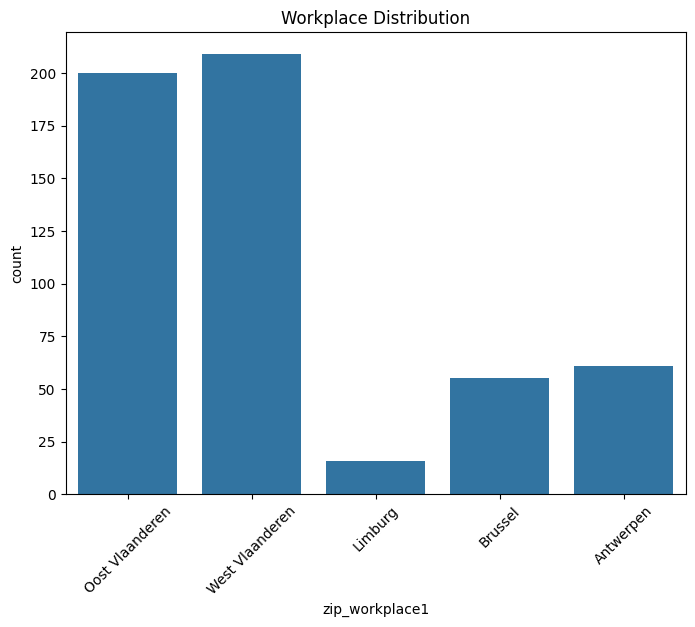

In [54]:
# Visualizing Frequency Distribution of Workplace
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=data['zip_workplace1'])
plt.title(f'Workplace Distribution')
plt.xticks(rotation=45)
plt.show()

#### 3. Degree Category

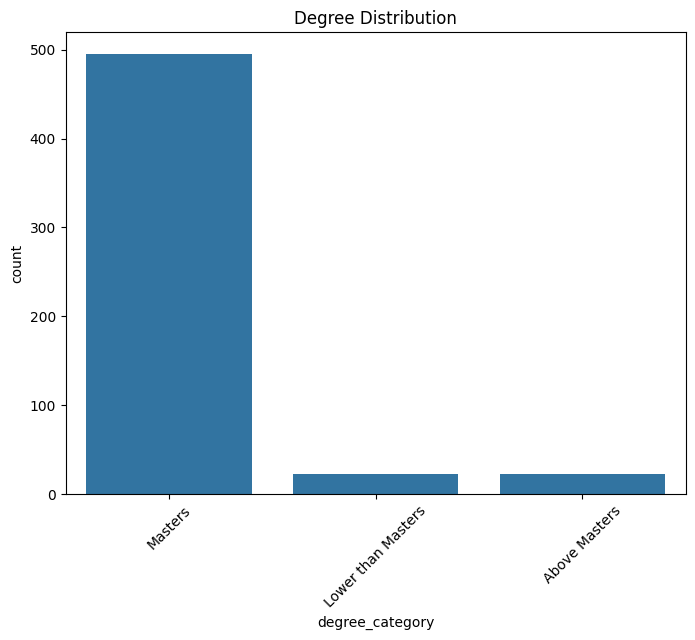

In [55]:
# Visualizing Frequency Distribution of Degree Category
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=data['degree_category'])
plt.title(f'Degree Distribution')
plt.xticks(rotation=45)
plt.show()

#### 4. Education 

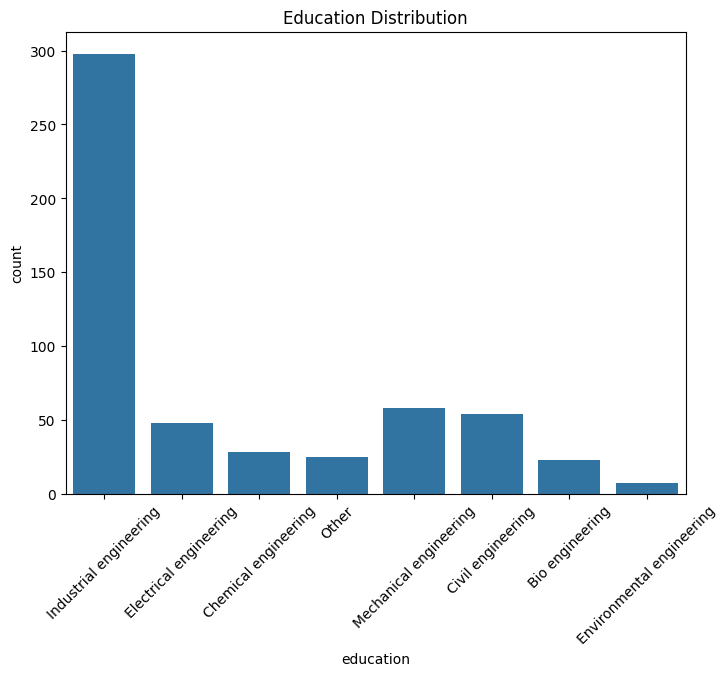

In [56]:
# Visualizing Frequency Distribution of Education
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=data['education'])
plt.title(f'Education Distribution')
plt.xticks(rotation=45)
plt.show()

#### 5. Experience Category

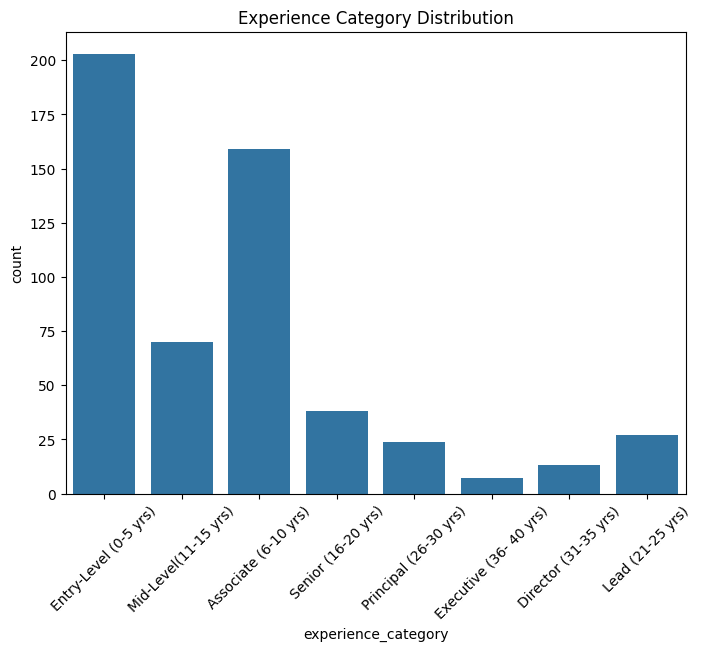

In [57]:
# Visualizing Frequency Distribution of Experience Category
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x=data['experience_category'])
plt.title(f'Experience Category Distribution')
plt.xticks(rotation=45)
plt.show()

#### 6. NACE

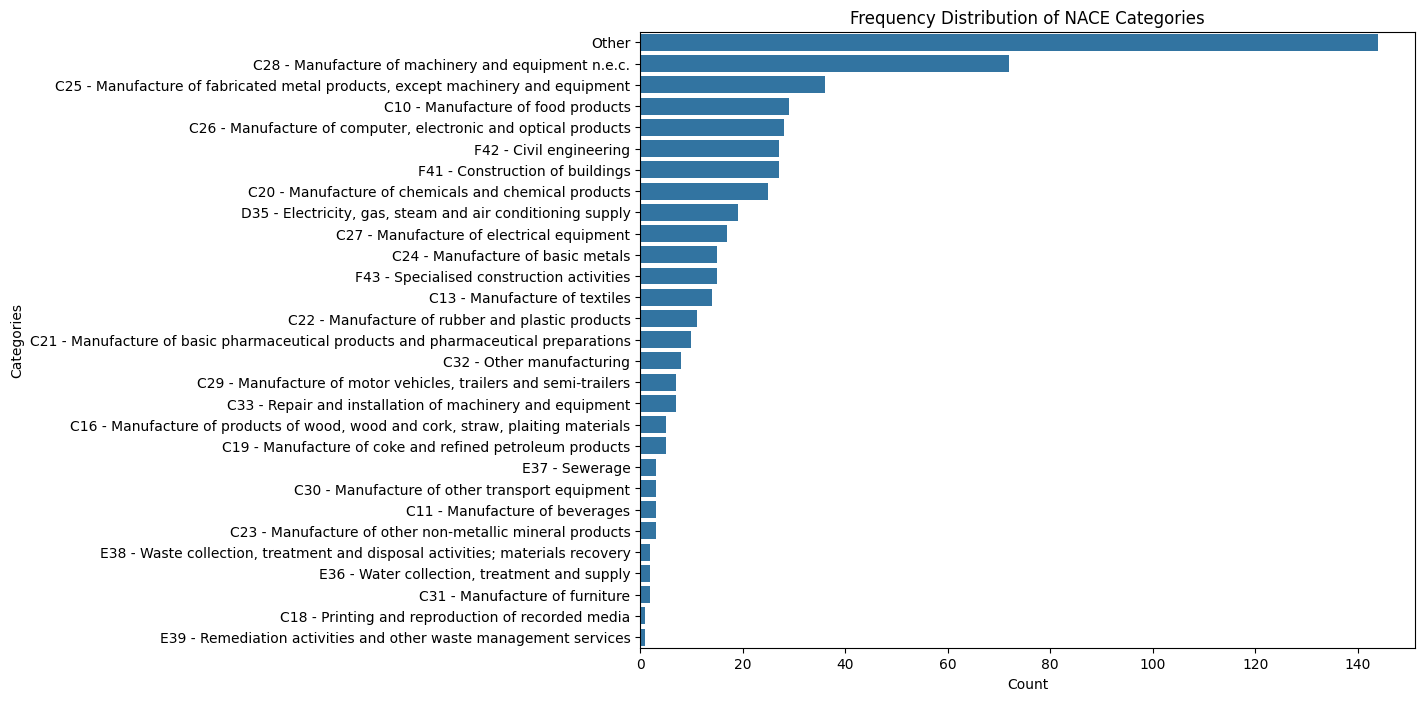

In [58]:
# Visualizing Frequency Distribution of NACE Category
plt.figure(figsize=(10, 8))
sns.countplot(data=data, y='nace', order=data['nace'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Frequency Distribution of NACE Categories')
plt.show()

#### 7. Income Distribution

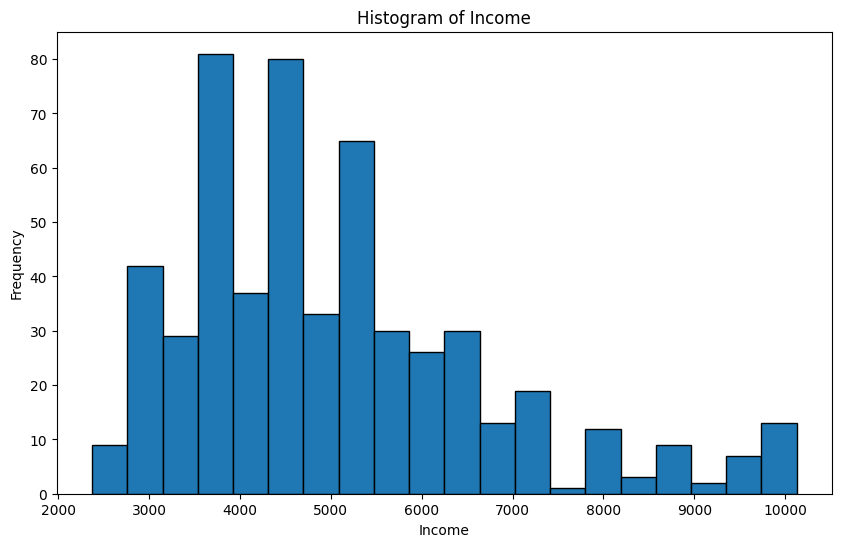

In [59]:
# Visualizing Frequency Distribution of Income
plt.figure(figsize=(10, 6))
plt.hist(data['income'], bins=20, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

#### Linear Regression

In [60]:
# Separate X and y
X = data.drop(columns=['income'], axis=1) # Features
y = data['income'] # Target variable

# Encode categorical variables in X
encoder = OneHotEncoder()
X = encoder.fit_transform(X).toarray()

# Fit the model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     7.908
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.25e-47
Time:                        11:58:33   Log-Likelihood:                -4559.9
No. Observations:                 541   AIC:                             9272.
Df Residuals:                     465   BIC:                             9598.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -41.0318    160.233     -0.256      0.7

In [68]:
lm_y_pred = model.predict(X)
lm_mse = mean_squared_error(y, lm_y_pred)
lm_mae = mean_absolute_error(y, lm_y_pred)
lm_r2 = r2_score(y, lm_y_pred)
print(f'Linear Regression - MSE : {lm_mse}, MAE : {lm_mae}, R-squared: {lm_r2}')

Linear Regression - MSE : 1226156.8832539846, MAE : 815.4081776482109, R-squared: 0.5605286858114107


In [62]:
# Save the model and encoder
with open('income_model.pkl', 'wb') as file:
    pickle.dump((model, encoder), file)